In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
best_city = pd.read_csv('best-countries-to-live-in-2024.csv')
best_city.head()

,population_2024,population_growthRate,land_area,country,region,unMember,population_density,population_densityMi,share_borders,Hdi2021,Hdi2020,WorldHappiness2022
0,1441719852,0.00916,3287590,India,Asia,True,484.9067,1255.9084,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",0.633,0.642,3.777
1,1425178782,-0.00035,9706961,China,Asia,True,151.2174,391.6530,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",0.768,0.764,5.585
2,341814420,0.00535,9372610,United States,North America,True,37.3673,96.7813,"CAN, MEX",0.921,0.920,6.977
3,279798049,0.00816,1904569,Indonesia,Asia,True,149.0254,385.9758,"TLS, MYS, PNG",0.705,0.709,5.240
4,245209815,0.01964,881912,Pakistan,Asia,True,318.0908,823.8551,"AFG, CHN, IND, IRN",0.544,0.543,4.516


In [7]:
best_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population_2024        141 non-null    int64  
 1   population_growthRate  141 non-null    float64
 2   land_area              141 non-null    int64  
 3   country                141 non-null    object 
 4   region                 141 non-null    object 
 5   unMember               141 non-null    bool   
 6   population_density     141 non-null    float64
 7   population_densityMi   141 non-null    float64
 8   share_borders          129 non-null    object 
 9   Hdi2021                141 non-null    float64
 10  Hdi2020                141 non-null    float64
 11  WorldHappiness2022     141 non-null    float64
dtypes: bool(1), float64(6), int64(2), object(3)
memory usage: 12.4+ KB


In [6]:
best_city.isnull().sum()

population_2024           0
population_growthRate     0
land_area                 0
country                   0
region                    0
unMember                  0
population_density        0
population_densityMi      0
share_borders            12
Hdi2021                   0
Hdi2020                   0
WorldHappiness2022        0
dtype: int64

In [10]:
best_city.columns

Index(['population_2024', 'population_growthRate', 'land_area', 'country',
       'region', 'unMember', 'population_density', 'population_densityMi',
       'share_borders', 'Hdi2021', 'Hdi2020', 'WorldHappiness2022'],
      dtype='object')

### Data Exploration

1- Using the world happiness column to find top ten countries

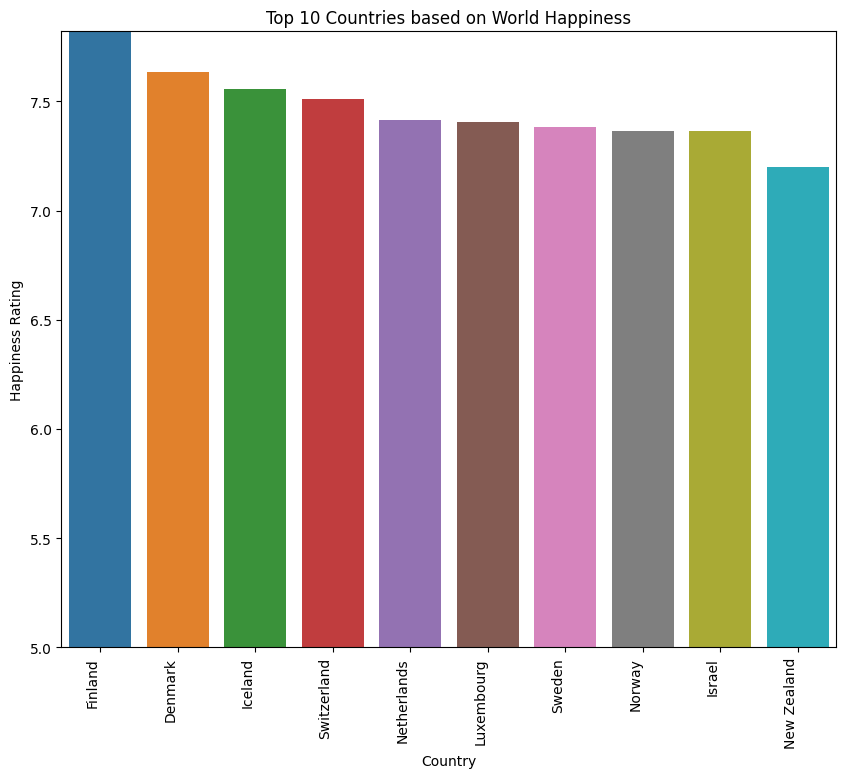

In [21]:
top_ten = best_city.nlargest(10, 'WorldHappiness2022')
plt.figure(figsize=(10, 8))
sns.barplot(x='country', y='WorldHappiness2022', data=top_ten)
plt.title('Top 10 Countries based on World Happiness')
plt.xlabel('Country')
plt.ylabel('Happiness Rating')
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.ylim(5, top_countries['WorldHappiness2022'].max() + 0)
plt.show()

2- Correlation analysis between the following catagories: population_2024', 'land_area', 'population_growthRate', 'population_densityMi', 'WorldHappiness2022'

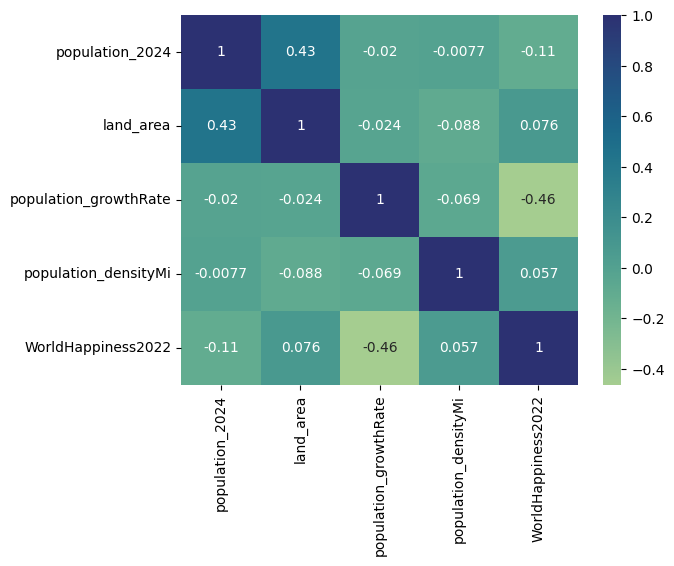

In [27]:
best_city_corr = ['population_2024', 'land_area', 'population_growthRate', 'population_densityMi', 'WorldHappiness2022']

sns.heatmap(best_city[best_city_corr].corr(), cmap ="crest", annot = True)
plt.show()

3- Comparing the population density by region

In [28]:
import plotly.express as px

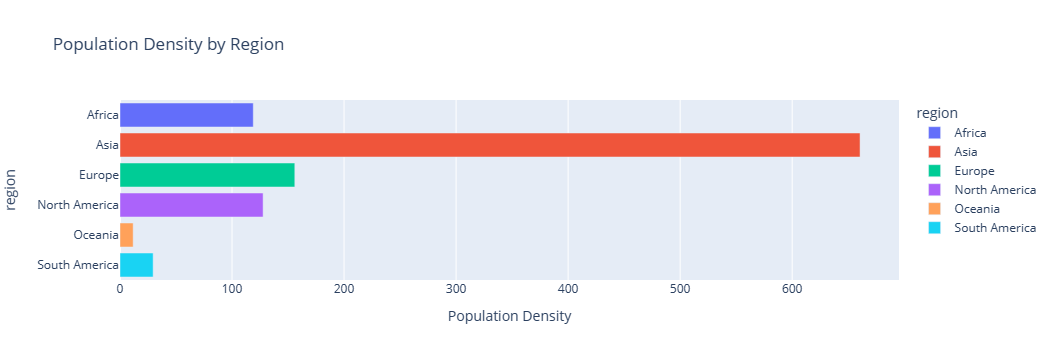

In [32]:
fig_bar = px.bar(best_city.groupby('region')['population_density'].mean().reset_index(),
                 y='region',
                 x='population_density',
                 title='Population Density by Region',
                 labels={'population_density': 'Population Density'},
                 color='region')
fig_bar.show()

4- Comparing the population by land area

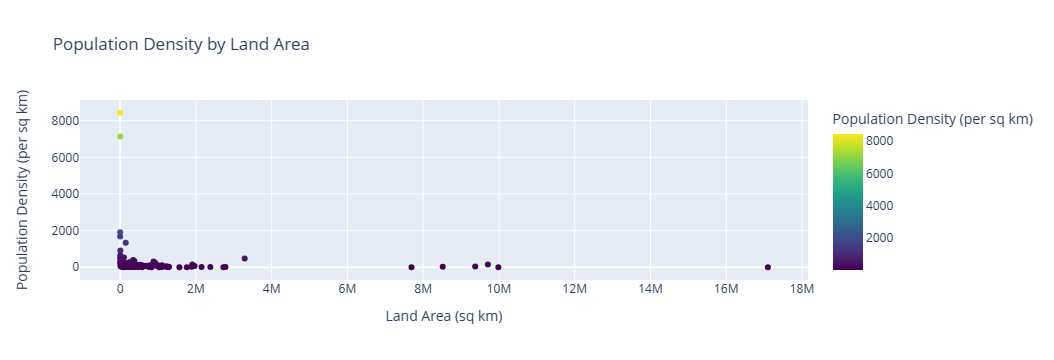

In [37]:
# Land Area vs. Population Density - Scatter plot
fig_area_density = px.scatter(best_city, x='land_area', y='population_density', 
                              title='Population Density by Land Area',
                              labels={'land_area': 'Land Area (sq km)', 'population_density': 'Population Density (per sq km)'},
                              color='population_density',
                              color_continuous_scale='Viridis')
fig_area_density.show()

5- Map visualization

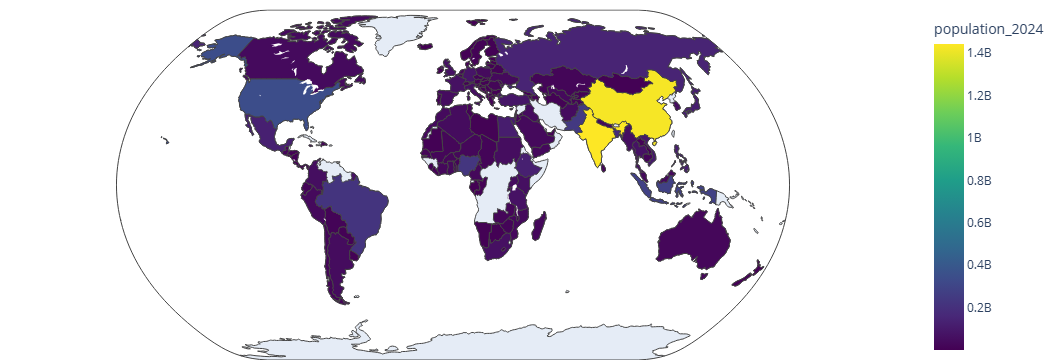

In [74]:
fig = px.choropleth(best_city.groupby('country')['population_2024'].sum().reset_index(), 
                    locations='country',
                    locationmode='country names',
                    color= 'population_2024',
                    hover_name='country',
                    color_continuous_scale='Viridis')
fig.update_geos(projection_type="natural earth", showcoastlines=True)
fig.update_layout( margin={"r":10,"t":10,"l":0,"b":0})
fig.show()

Most and Least Happy Countries

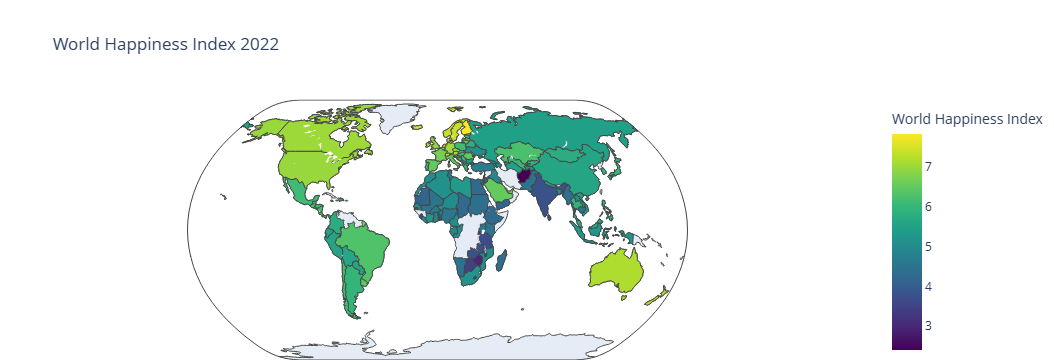

In [69]:
fig_happiness_map = px.choropleth(best_city, locations='country', locationmode='country names',
                                  color='WorldHappiness2022',
                                  title='World Happiness Index 2022',
                                  color_continuous_scale='Viridis',
                                  labels={'WorldHappiness2022': 'World Happiness Index'})

#fig_happiness_map.show()
fig_happiness_map.update_geos(projection_type="natural earth", showcoastlines=True)
fig_happiness_map.update_layout(margin={"r":10,"t":100,"l":10,"b":0} )
fig_happiness_map.show()